In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reviews/train.csv
/kaggle/input/hotel-reviews/test.csv


In [2]:
pip install keras-bert

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33516 sha256=09b6e1f921a786717a9926dcd76c95e2b5f9feb430e6f9c8402f65ab6c6811c8
  Stored in directory: /root/.cache/pip/wheels/e8/03/69/f1e19e8d13692ff5b8c928a2b2f418d1dcb6b36632460829bd
  Created wheel for keras-transformer: filename=keras_transformer-0.40.0-py3-none-any.whl size=12304 sha256=048637b08f7b22e66ded772530e7fb427680a20f29d817941c3efb7569899773
  Stored in directory: /root/.cache/pip/wheels/37/a3/bf/5f13470e6ff570a9fecc90d4e24ce34d2ee8b0af43c5333fb0
  Created wheel for keras-embed-sim: filename=keras_embed_sim-0.10.0-py3-none-any.whl size=3959 sha256=54516f323f6086ff6c1f647

In [3]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 31.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 47.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.7/263.7 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 31.7 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.35.1-py3-none-any.whl size=25316189 sha256=02f2d2fa8a624e17bc27470ecc6aeeff3e053fa3ad109f11e573d82eee4bc9b8
  Stored in directory: /root/.cache/pip/wheels/91/83/c9/86a84ae10fa81d6b7e454bd2da99a0043a9a0da3ef2f315b10
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=6619d0e6567cdc50b64d0c2c932da0fc346e770e86774d9442cf5fca15c7f3a0
  Stored in directory: /root/.cache/pip/wh

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import ktrain
from ktrain import text
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
import keras_bert

In [23]:
df_train = pd.read_csv('/kaggle/input/hotel-reviews/train.csv')
df_test = pd.read_csv('/kaggle/input/hotel-reviews/test.csv')

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66551 entries, 0 to 66550
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  66551 non-null  int64 
 1   Rating      66551 non-null  int64 
 2   Review      66551 non-null  object
 3   Sentiment   66551 non-null  int64 
 4   word_count  66551 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 2.5+ MB


In [6]:
df_train = df_train.iloc[:,2:4]
df_test = df_test.iloc[:,2:4]

In [7]:
df_train['Sentiment'].value_counts()


2    55930
0     5614
1     5007
Name: Sentiment, dtype: int64

In [8]:
df_test['Sentiment'].value_counts()

2    14050
0     1343
1     1245
Name: Sentiment, dtype: int64

In [9]:
df_train_pos = df_train[df_train['Sentiment']==2]
df_test_pos = df_test[df_test['Sentiment']==2]
#gt sample from df_train
df_train_pos = df_train_pos.sample(5700)
df_test_pos = df_test_pos.sample(1500)

In [10]:
df_train = pd.concat((df_train[df_train['Sentiment'].isin([0,1])], df_train_pos), ignore_index=True)
df_test = pd.concat((df_test[df_test['Sentiment'].isin([0,1])], df_test_pos), ignore_index=True)

In [11]:
df_train.shape, df_test.shape

((16321, 2), (4088, 2))

In [24]:
(train,val, preproc) = text.texts_from_df(train_df = df_train,
                                                                  text_column ="Review",
                                                                  label_columns = "Sentiment",
                                                                  val_df = df_test,
                                                                  maxlen = 375, #max num of words each review
                                                                  preprocess_mode= "distilbert"
                                                                  )

['Sentiment_0', 'Sentiment_1', 'Sentiment_2']
   Sentiment_0  Sentiment_1  Sentiment_2
0          0.0          0.0          1.0
1          0.0          0.0          1.0
2          0.0          0.0          1.0
3          0.0          0.0          1.0
4          0.0          0.0          1.0
['Sentiment_0', 'Sentiment_1', 'Sentiment_2']
   Sentiment_0  Sentiment_1  Sentiment_2
0          0.0          0.0          1.0
1          0.0          0.0          1.0
2          0.0          0.0          1.0
3          0.0          0.0          1.0
4          0.0          0.0          1.0
preprocessing train...
language: en
train sequence lengths:
	mean : 73
	95percentile : 207
	99percentile : 375


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 74
	95percentile : 209
	99percentile : 374


In [13]:
model = text.text_classifier(name = "distilbert",
                             train_data = train,
                             preproc = preproc, #from the last step
                             )

Is Multi-Label? False
maxlen is 375
done.


In [14]:
learner = ktrain.get_learner(model=model, 
                            train_data=train,
                            val_data=val,
                            batch_size = 12)

In [15]:
learner.fit(1e-5, 1)

1361/1361 [==============================] - 20611s 15s/step - loss: 0.6385 - accuracy: 0.7193 - val_loss: 0.5562 - val_accuracy: 0.7625


In [16]:
predictor = ktrain.get_predictor(learner.model,preproc=preproc)
predictor.save('/kaggle/working/distilbert_model')

In [17]:
predictor.predict("There is a problem with my computer monitor's resolution.  Everything is blurry.")

'Sentiment_0'

In [25]:
learner.validate(val_data=val, class_names=predictor.get_classes())

16638/16638 [==============================] - 6298s 379ms/step
              precision    recall  f1-score   support

 Sentiment_0       0.74      0.79      0.76      1343
 Sentiment_1       0.36      0.57      0.44      1245
 Sentiment_2       0.97      0.92      0.95     14050

    accuracy                           0.88     16638
   macro avg       0.69      0.76      0.72     16638
weighted avg       0.91      0.88      0.89     16638



array([[ 1058,   241,    44],
       [  248,   704,   293],
       [  128,   984, 12938]])

In [27]:
cfs = [[ 1058,   241,    44],
       [  248,   704,   293],
       [  128,   984, 12938]]


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual')]

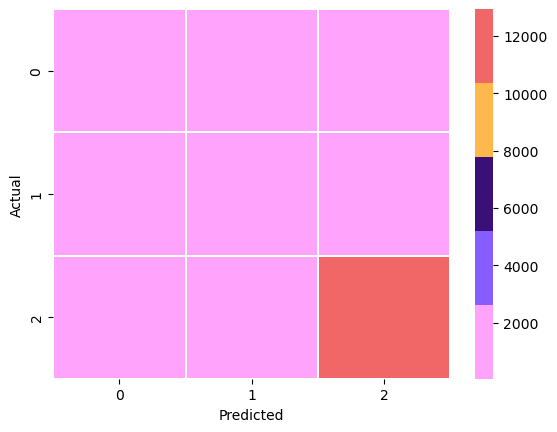

In [31]:
colors = ["#FFA3FD", "#865DFF","#3A1078","#FFB84C", "#F16767"]
sns.heatmap(cfs,linewidth = 0.2, cmap=sns.color_palette(colors)).set(xlabel = 'Predicted', ylabel = 'Actual')